# Exporing Graph Datasets in Jupyter

Juypter notebooks are perfect environments for both carrying out and capturing exporatory work. Even on moderate sizes datasets they provide an interactive environement that can drive both local and remote computational tasks.

In this example, we will load a datatset using pandas, visualise it using the Graphistry graph service and import that into NetworkX so we can examine thje data and run analytics on the graph.

### Python Package Network
Our raw python module requriements data comes in the form of a csv, which we use pands to load and cresate a DataFrame for us. Each python module (Node) is related to another via a version number (Edge)

In [1]:
import pandas
rawgraph = pandas.read_csv('./requirements.csv')

We also print out the first 15 rows of the data and we can see it contains

In [2]:
print('Number of Entries', rawgraph.count())
rawgraph.head(15)

Number of Entries package            110104
requirement         73773
package_name       108872
package_version    108872
dtype: int64


,package,requirement,package_name,package_version
0,02exercicio-1.0.0,NaN,02exercicio,1.0.0
1,0x10c-asm-0.0.2,NaN,0x10c-asm,0.0.2
2,115wangpan-0.7.6,beautifulsoup4,115wangpan,0.7.6
3,115wangpan-0.7.6,homura,115wangpan,0.7.6
4,115wangpan-0.7.6,humanize,115wangpan,0.7.6
5,115wangpan-0.7.6,pycurl,115wangpan,0.7.6
6,115wangpan-0.7.6,pysocks,115wangpan,0.7.6
7,115wangpan-0.7.6,requests,115wangpan,0.7.6
8,115wangpan-0.7.6,six,115wangpan,0.7.6
9,131228_pytest_1-1.0.0,NaN,131228_pytest_1,1.0.0


We notice straight away that our dataset has some NaN values for packages that have no requirements, this is a shortcoming of our dataset and we want to prevent those NaN's from propagating.

There are a few ways to handle this depending on whether we want to preserve the nodes in the graph or not, in this example we'll just drop that data using pandas.

In [3]:
rawgraph.dropna(inplace=True)
rawgraph.head(15)

,package,requirement,package_name,package_version
2,115wangpan-0.7.6,beautifulsoup4,115wangpan,0.7.6
3,115wangpan-0.7.6,homura,115wangpan,0.7.6
4,115wangpan-0.7.6,humanize,115wangpan,0.7.6
5,115wangpan-0.7.6,pycurl,115wangpan,0.7.6
6,115wangpan-0.7.6,pysocks,115wangpan,0.7.6
7,115wangpan-0.7.6,requests,115wangpan,0.7.6
8,115wangpan-0.7.6,six,115wangpan,0.7.6
12,199Fix-1.1.2,django,199Fix,1.1.2
16,2factorcli-1.1.3,docopt,2factorcli,1.1.3
17,2factorcli-1.1.3,onetimepass,2factorcli,1.1.3


## Visualizing the Graph

Efficient visualiations of anything but small graphs can be challenging in a local python environment, there are multiple ways around this but here we'll use a libreary and cloud based service called Graphisty.

First we'll start up Graphistry using our API key in order to access the cloud based rendering service.

In [4]:
from os import environ
from dotenv import load_dotenv, find_dotenv
import graphistry

load_dotenv(find_dotenv())
graphistry.register(key=environ.get("GRAPHISTRY_API_KEY"))

A new version of PyGraphistry is available (installed=0.9.43 latest=0.9.49).


Next we'll plot the raw graph. Graphistry provides an awesome interactive plot widget in Juypter that of couerse allows us to interact with the graph itself but have more options. If you have tiome to play check out in particular:

- Full screen mode
- Layout settings (via the cogs icon)
- Histograms and Data Table
- The Workbook which launches an cloud based instance of Graphistry outside of Jupyter
- Visual Clustering!

In [5]:
plotter = graphistry.bind(source="requirement", destination="package_name")
plotter.plot(rawgraph)

Next we'll load our raw graph data into a NetworkX graph and run some analytics on the network. This dataset is heavily weighted by packages with a few requirements. Note: We are loading this as a DirectedGraph which will allow the direction of dependencies to be preserved.

In [130]:
import networkx as nx
G = nx.from_pandas_dataframe(rawgraph, 'package_name', 'requirement', 
                             edge_attr='package_version', create_using=nx.DiGraph())
print('Nodes:', G.number_of_nodes())
print('Edges:', G.number_of_edges())

Nodes: 26234
Edges: 72252


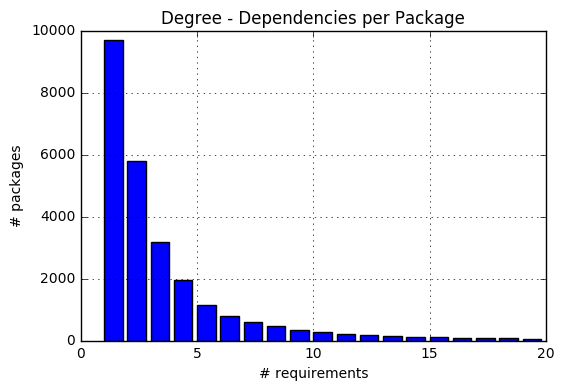

In [131]:
import numpy as np
import matplotlib.pyplot as plt

degrees = np.array(nx.degree_histogram(G))

plt.bar(range(1,20), degrees[1:20])
plt.xlabel('# requirements')
plt.ylabel('# packages')
plt.title('Degree - Dependencies per Package')
plt.grid(True)
plt.show()

We can see this network is dominated with packages with a single requirement, accounting for 37% of the nodes.

In [132]:
print('% of packages with only 1 requirement', 
      '{:.1f}%'.format(100 * degrees[1] / G.number_of_nodes()), ',', degrees[1], 'packages total')

% of packages with only 1 requirement 37.0% , 9707 packages total


In [133]:
highestDegree = len(degrees) - 1
nodesByDegree = G.degree()

mostConnectedNode = [n for n in nodesByDegree if nodesByDegree[n] == highestDegree][0]

print(mostConnectedNode)

print('The package with most requirements is >',mostConnectedNode,
      '< having a total of', len(degrees), 'first order dependencies')

requests
The package with most requirements is > requests < having a total of 3081 first order dependencies


However, we are looking at all connections to requests in this directed graph, so this is a combination of it's dependencies and packages that are dependent on it. We can see how that is split by looking at the in and out degree.

In [134]:
print('Depencencies:', G.out_degree([mostConnectedNode])[mostConnectedNode])
print('Dependants:', G.in_degree([mostConnectedNode])[mostConnectedNode])

Depencencies: 6
Dependants: 3074


So rather than having a lot of requirements, we've discovered that `requests` actually has few requirements and is instead a heavily used module. we can take a closer look by extracting a sub-graph of `requests`' immedate neighbours and visualising this.

In [147]:
R = G.subgraph([mostConnectedNode]+G.neighbors(mostConnectedNode)+G.predecessors(mostConnectedNode))
graphistry.bind(source="requirement", destination="package_name").plot(R)

Note the visualizaton above was created by plotting the sub graph then using Grapistry's Visual Clustering to do its stuff.